<a href="https://colab.research.google.com/github/Pratyushk2003/Credit-Card-Fraud/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [4]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
#Under-Sampling

#Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
legit_sample = legit.sample(n=492)

In [15]:
#Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
203245,134733.0,2.012512,-0.055116,-1.245330,0.272995,0.230934,-0.609708,0.207339,-0.220928,0.423374,...,-0.199295,-0.377174,0.181837,-0.402258,-0.001667,-0.539438,-0.009090,-0.061492,12.62,0
133668,80483.0,0.842036,-0.563361,1.122722,1.428766,-1.063401,0.234903,-0.467269,0.232634,0.783630,...,-0.048339,-0.226431,-0.112981,0.322538,0.347021,-0.486971,0.041197,0.048822,144.82,0
270645,164187.0,1.958696,-0.511779,-0.381582,0.330923,-0.634086,-0.088273,-0.750397,0.141757,1.329242,...,0.213074,0.809371,0.065890,-0.397962,-0.095898,-0.206439,0.033425,-0.051687,9.99,0
248,168.0,1.274967,-0.778783,1.162453,-0.180425,-1.532631,-0.101808,-1.185738,0.076522,-0.265080,...,-0.154061,0.003713,-0.040272,-0.103367,0.129752,0.605919,0.032167,0.036730,42.90,0
141796,84494.0,1.306736,-0.293577,0.581248,-0.932616,-0.705682,-0.319327,-0.517998,-0.040194,1.717134,...,-0.055242,0.147238,-0.152248,-0.402282,0.648359,-0.638107,0.099533,0.029078,1.00,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [19]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94934.774390,0.052107,0.029038,-0.017123,-0.005344,-0.120045,0.037887,0.017773,0.128828,0.050846,...,0.008077,0.017662,0.037418,-0.027079,0.045209,0.008281,0.009446,-0.038366,-0.000835,102.647744
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
#Splitting the data into Features & Targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [21]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
203245  134733.0  2.012512 -0.055116 -1.245330  0.272995  0.230934 -0.609708   
133668   80483.0  0.842036 -0.563361  1.122722  1.428766 -1.063401  0.234903   
270645  164187.0  1.958696 -0.511779 -0.381582  0.330923 -0.634086 -0.088273   
248        168.0  1.274967 -0.778783  1.162453 -0.180425 -1.532631 -0.101808   
141796   84494.0  1.306736 -0.293577  0.581248 -0.932616 -0.705682 -0.319327   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [22]:
print(Y)

203245    0
133668    0
270645    0
248       0
141796    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [25]:
#Model Training using Logistic Regression
model = LogisticRegression()

In [26]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [28]:
print(X_train)

            Time         V1        V2         V3        V4         V5  \
100623   67571.0  -0.758469 -0.045410  -0.168438 -1.313275  -1.901763   
94008    64687.0  -1.427608 -2.142457   0.635883 -1.137300   1.113543   
168481  119244.0   1.886146 -0.604160  -1.024039  0.922060  -0.428544   
114393   73463.0  -0.626755  0.786381   0.360184  1.402863   0.065054   
284686  172681.0   1.906371  0.348051  -0.045250  3.674544   0.167549   
...          ...        ...       ...        ...       ...        ...   
278346  168172.0  -0.307850  0.731299  -0.146203 -0.620353   1.376036   
50904    44701.0   1.092422 -0.037936   0.268265  0.998226  -0.215957   
223618  143456.0  -2.006582  3.676577  -5.463811  7.232058  -1.627859   
43061    41353.0 -15.020981  8.075240 -16.298091  5.664820 -11.918153   
154712  102651.0   2.017473  0.046721  -2.162189  0.354650   1.005652   

              V6         V7        V8        V9  ...       V20       V21  \
100623  0.739433   3.071892 -0.483422  0.618203

In [29]:
print(Y_train)

100623    1
94008     0
168481    0
114393    0
284686    0
         ..
278346    0
50904     0
223618    1
43061     1
154712    0
Name: Class, Length: 787, dtype: int64


In [30]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9440914866581956


In [31]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print(X_test)

            Time         V1         V2         V3         V4         V5  \
247995  153761.0   1.146259   1.403458  -4.159148   2.660107  -0.323217   
76590    56640.0  -1.777212  -1.244291   1.218142   0.252181   2.253430   
131166   79513.0   1.205618   0.151903   0.068189   0.103333  -0.255791   
173983  121717.0   1.961611  -0.157462  -1.662327   0.498324  -0.124284   
15451    26833.0 -20.532751  12.373989 -23.009003   6.144821 -15.587296   
...          ...        ...        ...        ...        ...        ...   
108258   70828.0   0.196707   1.189757   0.704882   2.891388   0.045555   
12108    21046.0 -16.917468   9.669900 -23.736443  11.824990  -9.830548   
99506    67150.0  -1.824295   0.403327  -1.994122   2.756558  -3.139064   
74496    55614.0  -7.347955   2.397041  -7.572356   5.177819  -2.854838   
33766    37378.0  -2.414911  -2.626376   1.053396  -0.496263  -2.474264   

              V6         V7         V8        V9  ...       V20       V21  \
247995 -1.836071  -1.6

In [33]:
print(Y_test)

247995    1
76590     0
131166    0
173983    0
15451     1
         ..
108258    1
12108     1
99506     1
74496     1
33766     0
Name: Class, Length: 197, dtype: int64


In [34]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264


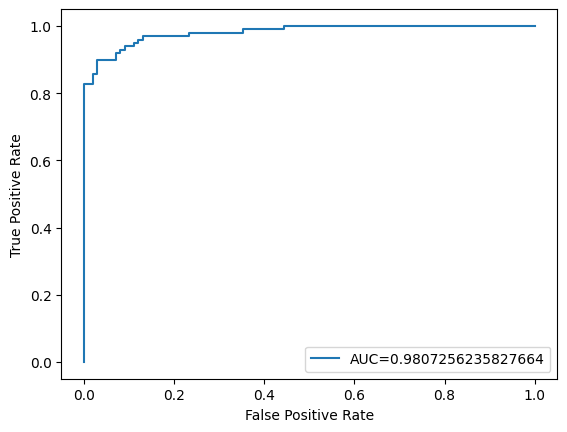

In [35]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [36]:
#SVM
# Create an SVM classifier object
classifier = svm.SVC(kernel='linear')

In [37]:
# Train the classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [38]:
# accuracy on training data
y_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_pred, Y_train)

In [39]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9135959339263025


In [40]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [41]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9086294416243654


In [44]:
# Create a Random Forest classifier object
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
# Train the classifier
classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [46]:
# accuracy on training data
y_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_pred, Y_train)

In [47]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [48]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [49]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249
